In [4]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


# **DEFINING THE FONT STYLE AS A STRUCTURE AND THEN CONVERTING THE TEXT TO THIS STYLE**

In [28]:
Font_Style = {
    "A":[0b01110,
         0b10001,
         0b10001,
         0b11111,
         0b10001,
         0b10001,
         0b10001],
    "B":[0b11110,
         0b10001,
         0b10001,
         0b11110,
         0b10001,
         0b10001,
         0b11110],
    "C":[0b01110,
         0b10001,
         0b10000,
         0b10000,
         0b10000,
         0b10001,
         0b01110],
    "D":[0b11100,
         0b10010,
         0b10001,
         0b10001,
         0b10001,
         0b10010,
         0b11100],
    "E":[0b11111,
         0b10000,
         0b10000,
         0b11110,
         0b10000,
         0b10000,
         0b11111],
    "F":[0b11111,
         0b10000,
         0b10000,
         0b11110,
         0b10000,
         0b10000,
         0b10000],
    "G":[0b01110,
         0b10001,
         0b10000,
         0b10111,
         0b10001,
         0b10001,
         0b01110],
    "H":[0b10001,
         0b10001,
         0b10001,
         0b11111,
         0b10001,
         0b10001,
         0b10001],
    "I":[0b01110,
         0b00100,
         0b00100,
         0b00100,
         0b00100,
         0b00100,
         0b01110],
    "J":[0b00111,
         0b00010,
         0b00010,
         0b00010,
         0b00010,
         0b10010,
         0b01100],
    "K":[0b10001,
         0b10010,
         0b10100,
         0b11000,
         0b10100,
         0b10010,
         0b10001],
    "L":[0b10000,
         0b10000,
         0b10000,
         0b10000,
         0b10000,
         0b10000,
         0b11111],
    "M":[0b10001,
         0b11011,
         0b10101,
         0b10101,
         0b10001,
         0b10001,
         0b10001],
    "N":[0b10001,
         0b11001,
         0b10101,
         0b10011,
         0b10001,
         0b10001,
         0b10001],
    "O":[0b01110,
         0b10001,
         0b10001,
         0b10001,
         0b10001,
         0b10001,
         0b01110],
    "P":[0b11110,
         0b10001,
         0b10001,
         0b11110,
         0b10000,
         0b10000,
         0b10000],
    "Q":[0b01110,
         0b10001,
         0b10001,
         0b10001,
         0b10101,
         0b10010,
         0b01101],
    "R":[0b11110,
         0b10001,
         0b10001,
         0b11110,
         0b10100,
         0b10010,
         0b10001],
    "S":[0b01111,
         0b10000,
         0b10000,
         0b01110,
         0b00001,
         0b00001,
         0b11110],
    "T":[0b11111,
         0b00100,
         0b00100,
         0b00100,
         0b00100,
         0b00100,
         0b00100],
    "U":[0b10001,
         0b10001,
         0b10001,
         0b10001,
         0b10001,
         0b10001,
         0b01110],
    "V":[0b10001,
         0b10001,
         0b10001,
         0b10001,
         0b10001,
         0b01010,
         0b00100],
    "W":[0b10001,
         0b10001,
         0b10001,
         0b10101,
         0b10101,
         0b11011,
         0b10001],
    "X":[0b10001,
         0b10001,
         0b01010,
         0b00100,
         0b01010,
         0b10001,
         0b10001],
    "Y":[0b10001,
         0b10001,
         0b01010,
         0b00100,
         0b00100,
         0b00100,
         0b00100],
    "Z":[0b11111,
         0b00001,
         0b00010,
         0b00100,
         0b01000,
         0b10000,
         0b11111],
    " ":[0b00000,
         0b00000,
         0b00000,
         0b00000,
         0b00000,
         0b00000,
         0b00000],
    ".":[0b00000,
         0b00000,
         0b00000,
         0b00000,
         0b00000,
         0b00110,
         0b00110],
    ",":[0b00000,
         0b00000,
         0b00000,
         0b00000,
         0b00000,
         0b00110,
         0b00010],
    "!":[0b00100,
         0b00100,
         0b00100,
         0b00100,
         0b00100,
         0b00000,
         0b00100],
    "?":[0b01110,
         0b10001,
         0b00001,
         0b00010,
         0b00100,
         0b00000,
         0b00100],
}

CHAR_W = 5
CHAR_H = 7


def render_text_to_image(text, scale=8, spacing=2, line_spacing=4):

    lines = text.split("\n")

    max_width = max(len(line) for line in lines) * (CHAR_W + spacing)
    height = len(lines) * (CHAR_H + line_spacing)

    img = np.ones((height * scale, max_width * scale, 3), dtype=np.uint8) * 255

    y_offset = 2
    for line in lines:
        x_offset = 2
        for ch in line:
            ch = ch.upper()
            bitmap = Font_Style.get(ch, Font_Style[" "])
            for row, bits in enumerate(bitmap):
                for col in range(CHAR_W):
                    if (bits >> (CHAR_W-1-col)) & 1:
                        x1 = (x_offset + col) * scale
                        y1 = (y_offset + row) * scale
                        cv2.rectangle(img, (x1, y1), (x1+scale-1, y1+scale-1), (0,0,0), -1)
            x_offset += CHAR_W + spacing
        y_offset += CHAR_H + line_spacing

    return img


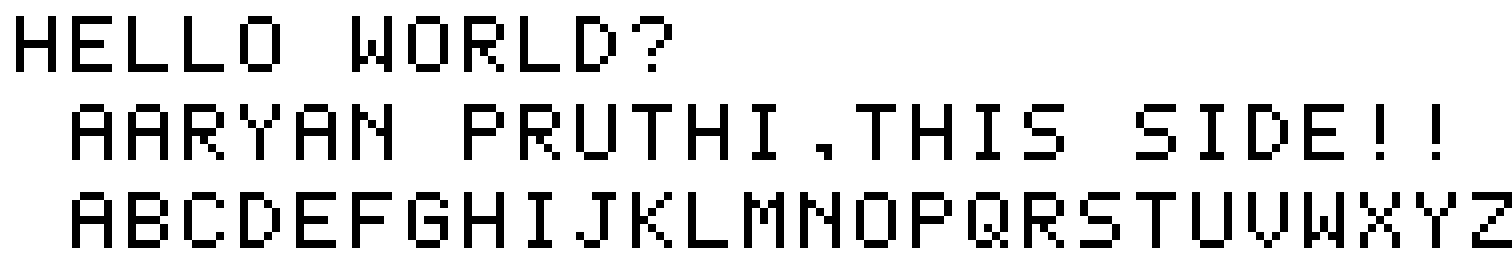

In [31]:
text = "Hello World?\n Aaryan Pruthi,THIS SIDE!!\n ABCDEFGHIJKLMNOPQRSTUVWXYZ"
img = render_text_to_image(text)
cv2.imwrite("cv2_rendered.png", img)
cv2_imshow( img)
cv2.waitKey(0)
cv2.destroyAllWindows()